In [67]:
import numpy as np
from numpy.random import random, normal
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact

In [2]:
N_times = int(1e5)
eps=1e-1
times = 100 * np.sort(random(N_times))

In [3]:
y = np.cos(times) + normal(scale=eps, size=N_times)

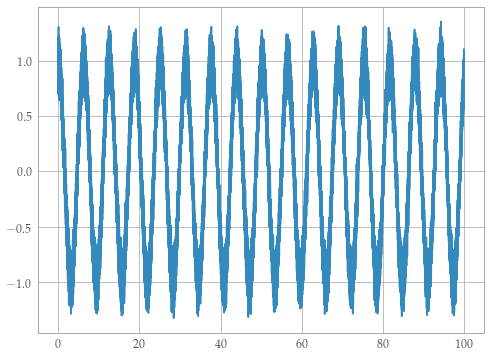

In [4]:
plt.plot(times, y)

In [5]:
def phased_times(times, period):
    return(times % period)

In [6]:
def line_length(pt, y):
    sorted_indices = np.argsort(pt)
    pt = pt[sorted_indices]
    y = y[sorted_indices]
    
    dy = np.ediff1d(y)
    dx = np.ediff1d(pt)
    return(np.sum(np.sqrt(dx**2 + dy**2)))

line_length = np.vectorize(line_length, signature='(n),(n)->()')

In [7]:
periods = np.linspace(np.pi, 3*np.pi, num=500)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


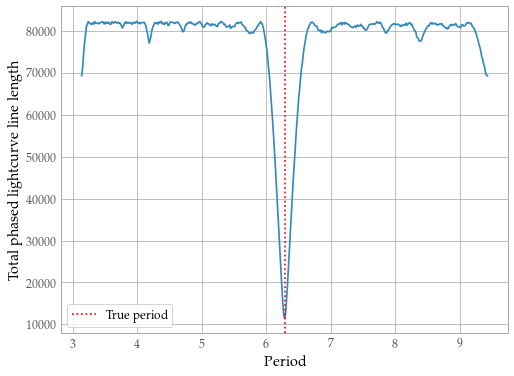

In [8]:
pt = phased_times(times[:, np.newaxis], periods).T
llts = line_length(pt, y)
plt.plot(periods, llts)
plt.xlabel('Period')
plt.ylabel('Total phased lightcurve line length')
plt.axvline(2*np.pi, label='True period', c='r', ls=':')
plt.legend()
plt.savefig('linelength.pdf')

In [43]:
oceti = pd.read_csv('aavsodata_5e32decd0da80.txt')
oceti = oceti[np.invert(pd.to_numeric(oceti['Magnitude'], errors='coerce').isnull())]

/home/jacopo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (8,14,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
oceti_mag = np.array(oceti['Magnitude'], dtype=np.float)
oceti_times = oceti['JD']

discard_first=5000
oceti_mag = oceti_mag[discard_first:]
oceti_times = np.array(oceti_times, dtype=np.float)[discard_first:]

oceti_days = oceti_times - oceti_times[0]

In [82]:
oceti_periods = np.linspace(330, 336, num=400)
oceti_pt = phased_times(oceti_days[:, np.newaxis], oceti_periods).T
oceti_llts = line_length(oceti_pt, oceti_mag)


In [83]:
oceti_periods[np.argmin(oceti_llts)]

333.23308270676694

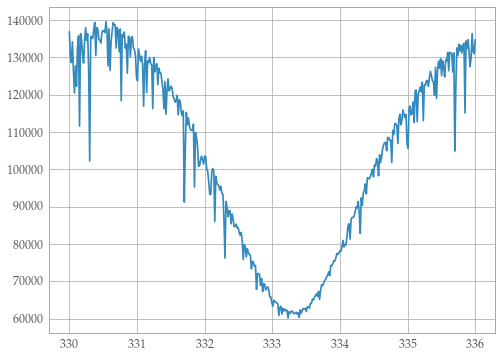

In [84]:
plt.plot(oceti_periods, oceti_llts)

In [81]:
def p(period):
    plt.scatter(phased_times(oceti_days, period), oceti_mag, s=.5)
    
interact(p, period=(332, 335, .01))

interactive(children=(FloatSlider(value=333.0, description='period', max=335.0, min=332.0, step=0.01), Output(…

<function __main__.p(period)>

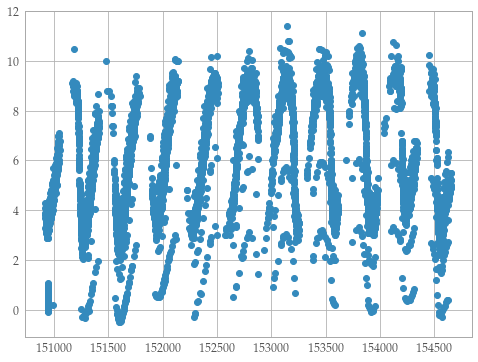

In [58]:
plt.scatter(oceti_days[-10000:], oceti_mag[-10000:])